In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### 导入相关第三方库

In [2]:
import numpy as np
from random import *
import matplotlib.pyplot as plt

###  在直线y=2.44x+5.36周围生成一组10个数据的数据集
#### 直线方程上加一个高斯扰动

In [3]:
x_list = 20 * np.random.rand(500)
x_list.shape[0]
x_list
xx = np.array([x_list]).T

500

array([1.20147882e+01, 8.62398980e+00, 6.07147051e+00, 1.36357913e+01,
       1.92141074e+01, 1.61261837e+01, 1.29179057e+01, 1.12414086e+01,
       1.58340403e+01, 6.80027380e+00, 1.67733845e+01, 1.38477821e+01,
       1.43316740e+01, 1.69038111e+01, 8.37320030e+00, 1.99007206e+01,
       8.44230259e+00, 6.01762688e+00, 1.52887049e+01, 2.62781687e+00,
       1.59924639e+01, 1.11168275e+01, 1.79092030e+01, 9.71156307e+00,
       2.27006956e+00, 1.47265525e+01, 8.60317316e+00, 1.02300487e+01,
       1.08286884e+01, 4.59087091e+00, 1.17484130e+01, 1.38943221e+01,
       1.79802980e+01, 2.61013336e+00, 2.53470945e+00, 1.01070581e+01,
       9.17234486e+00, 1.14181743e+01, 1.03409724e-01, 6.36035273e+00,
       1.31828066e+01, 1.14391149e+01, 1.50009044e+01, 4.83363243e+00,
       1.46405270e+01, 1.96220813e+01, 1.13109719e+01, 8.74563932e+00,
       1.79158419e+01, 1.56900451e+01, 5.92280021e+00, 2.90056591e+00,
       1.12235850e+01, 1.69923197e+01, 1.93712860e+01, 1.92161548e+01,
      

In [4]:
def x_to_yList(xlist, f):
    return [f(x) for x in xlist]

y_list = x_to_yList(x_list, lambda x: 2.44 * x + (5.36 + gauss(0, 5)))
# y_list
np.inner(x_list, y_list)

198868.31129988475

### 原函数模型建立

In [5]:
m = x_list.shape[0]
def h(t0, t1, x):
    r = t0 + t1 * x
    return r

### 构建代价函数

In [6]:
def cost_f(t0, t1, x1, y1):
    delta = t0 + t1 * x1 - y1
    cost = np.inner(delta, delta) / (2 * m)
    return cost

cc0 = cost_f(t0 = 0.0, t1 = 0.0, x1 = x_list, y1 = y_list)
cc0

583.1726203871251

### 代价函数偏导数计算

In [7]:
def de(t0, t1, _x, _y):
    delta = t0 + t1 * _x - _y
    de0 = np.inner(delta, np.ones(m)) / m
    de1 = np.inner(x_list, delta) / m
    return de0, de1

### 梯度下降法迭代

(5.1997945445866005, 2.463117767867946)

12.787019563183833

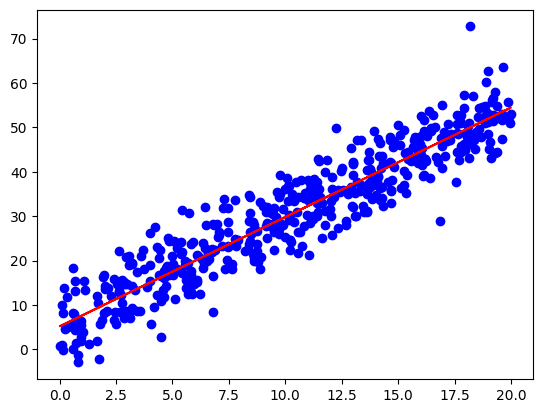

In [8]:
def grad_decent(_theta0, _theta1, x, y, epoch, alpha):
    for i in range(epoch):
        cost1 = cost_f(t0 = _theta0, t1 = _theta1, x1 = x, y1 = y)
        de0, de1 = de(t0 = _theta0, t1 = _theta1, _x = x, _y = y)
        _theta0 = _theta0 - alpha * de0
        _theta1 = _theta1 - alpha * de1
        cost2 = cost_f(t0 = _theta0, t1 = _theta1, x1 = x, y1 = y)
        if cost1 - cost2 < 1e-10:
            break
    return _theta0, _theta1


theta0 = 0.0
theta1 = 0.0
qq = grad_decent(theta0, theta1, x = x_list, y = y_list, epoch = 1000000, alpha = 0.00001)
theta0, theta1 = qq
qq
cost_func = cost_f(t0 = theta0, t1 = theta1, x1 = x_list, y1 = y_list)
cost_func
plt.plot(x_list, (theta0 + theta1 * x_list), color = 'red')
plt.scatter(x_list, y_list, color = 'blue')